### Import all necessary packages

In [47]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import json

###  Reading the json file

In [2]:
worker_file = 'Dataset_json.json'

In [3]:
json_file = open(worker_file)

In [4]:
json_string = json_file.read() 
json_data = json.loads (json_string) 

###  Extracting bb information from json file 

In [5]:
json_data.keys()

dict_keys(['001.jpg9179', '002.jpg6371', '003.jpg9883', '004.jpg5394', '005.jpg7379', '006.jpg14582', '007.jpg5242', '009.jpg5818', '010.jpg8322', '011.jpg12786', '012.jpg4797', '013.jpg14965', '014.jpg8371', '015.jpg9228', '016.jpg10329', '017.jpg9292', '018.jpg8254', '020.jpg14166', '021.jpg9759', '022.jpg8730', '023.jpg9878', '024.jpg12135', '025.jpg12704', '026.jpg15488', '027.jpg8096', '028.jpg5858', '029.jpg10801', '030.jpg8096', '031.jpg8920', '032.jpg7099', '033.jpg11177', '034.jpg16150', '035.jpg11177', '036.jpg14855', '037.jpg11731', '038.jpg9531', '039.jpg17157', '040.jpg10047', '041.jpg5322', '042.jpg5810', '043.jpg7811', '044.jpg11801', '045.jpg7099', '046.jpg14261', '047.jpg14670', '048.jpg8781', '049.jpeg27063', '050.jpg11892', '051.jpg9589', '052.jpg9207', '053.jpg10495', '054.jpg10916', '056.jpg5637', '057.jpg12330', '058.jpg10025', '059.jpg13264', '060.jpg10244', '061.jpg5637', '062.jpg9363', '063.jpg13387', '064.jpg13993', '065.jpg5738', '066.jpg10183', '067.jpg6262'

In [6]:
data = []
for j in json_data.keys():
    for i in ((json_data[j])['regions']):
        data.append([j,i['shape_attributes']['x'],i['shape_attributes']['y'],i['shape_attributes']['width'],i['shape_attributes']['height']])

In [7]:
col_names = ['image_name','bbx_start','bby_start','bb_width','bb_height']

In [8]:
majdoor = pd.DataFrame(data,columns=col_names)

In [9]:
majdoor['image_name'] = [i.split('.jpg')[0]+'.jpg' for i in majdoor['image_name']]

In [10]:
majdoor['bb_centroidx'] = majdoor['bbx_start'] + (majdoor['bb_width']/2).astype(float)

In [11]:
majdoor['bb_centroidy'] = majdoor['bby_start'] + (majdoor['bb_height']/2).astype(float)

In [12]:
majdoor

,image_name,bbx_start,bby_start,bb_width,bb_height,bb_centroidx,bb_centroidy
0,001.jpg,67,36,33,16,83.5,44.0
1,001.jpg,60,74,38,62,79.0,105.0
2,001.jpg,74,204,22,28,85.0,218.0
3,001.jpg,89,205,34,23,106.0,216.5
4,002.jpg,66,81,48,76,90.0,119.0
...,...,...,...,...,...,...,...
452,080.jpg,71,67,56,88,99.0,111.0
453,080.jpg,23,35,66,88,56.0,79.0
454,080.jpg,1,41,48,87,25.0,84.5
455,080.jpg,193,40,46,86,216.0,83.0


In [13]:
majdoor.isnull().sum()

image_name      0
bbx_start       0
bby_start       0
bb_width        0
bb_height       0
bb_centroidx    0
bb_centroidy    0
dtype: int64

### Reading the images to get image hight and weidth 

In [14]:
import matplotlib.pyplot as plt
from skimage import io

In [16]:
from PIL import Image

In [17]:
import os

In [18]:
image_x = []
image_y = []
image_name = []
for i in os.listdir('majdoor/'):
    path = 'majdoor/'+i
    img = Image.open(path)
    image_x.append(img.size[0])
    image_y.append(img.size[1])
    image_name.append(i)

In [19]:
image_info = pd.DataFrame({'image_name':image_name,'image_x':image_x,'image_y':image_y})

In [20]:
image_info

,image_name,image_x,image_y
0,006.jpg,275,183
1,055.jpg,2592,3872
2,080.jpg,261,193
3,051.jpg,270,186
4,033.jpg,292,173
...,...,...,...
74,023.jpg,266,189
75,053.jpg,275,183
76,077.jpg,275,184
77,062.jpg,178,283


In [21]:
img = Image.open('majdoor/001.jpg')

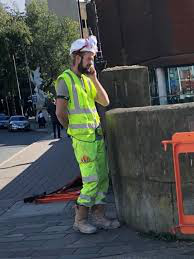

In [22]:
display(img)

In [23]:
final_dataset = majdoor.merge(image_info,on = 'image_name',how = 'left')

In [24]:
final_dataset.head(5)

,image_name,bbx_start,bby_start,bb_width,bb_height,bb_centroidx,bb_centroidy,image_x,image_y
0,001.jpg,67,36,33,16,83.5,44.0,194.0,259.0
1,001.jpg,60,74,38,62,79.0,105.0,194.0,259.0
2,001.jpg,74,204,22,28,85.0,218.0,194.0,259.0
3,001.jpg,89,205,34,23,106.0,216.5,194.0,259.0
4,002.jpg,66,81,48,76,90.0,119.0,183.0,275.0


In [25]:
final_dataset.dropna(inplace=True)

### Normalizing the data 

In [26]:
final_dataset['bbox_x_new'] = final_dataset['bb_centroidx'].astype(int)/final_dataset['image_x'].astype(float)
final_dataset['bbox_y_new'] = final_dataset['bb_centroidy'].astype(int)/final_dataset['image_y'].astype(float)

In [27]:
final_dataset.head()

,image_name,bbx_start,bby_start,bb_width,bb_height,bb_centroidx,bb_centroidy,image_x,image_y,bbox_x_new,bbox_y_new
0,001.jpg,67,36,33,16,83.5,44.0,194.0,259.0,0.427835,0.169884
1,001.jpg,60,74,38,62,79.0,105.0,194.0,259.0,0.407216,0.405405
2,001.jpg,74,204,22,28,85.0,218.0,194.0,259.0,0.438144,0.841699
3,001.jpg,89,205,34,23,106.0,216.5,194.0,259.0,0.546392,0.833977
4,002.jpg,66,81,48,76,90.0,119.0,183.0,275.0,0.491803,0.432727


In [28]:
final_dataset.isnull().sum()

image_name      0
bbx_start       0
bby_start       0
bb_width        0
bb_height       0
bb_centroidx    0
bb_centroidy    0
image_x         0
image_y         0
bbox_x_new      0
bbox_y_new      0
dtype: int64

In [29]:
import seaborn as sns

### Check the distribution  

/home/jd/anaconda3/envs/eva5/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

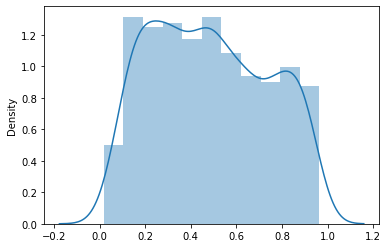

In [30]:
sns.distplot(final_dataset[['bbox_x_new','bbox_y_new']])

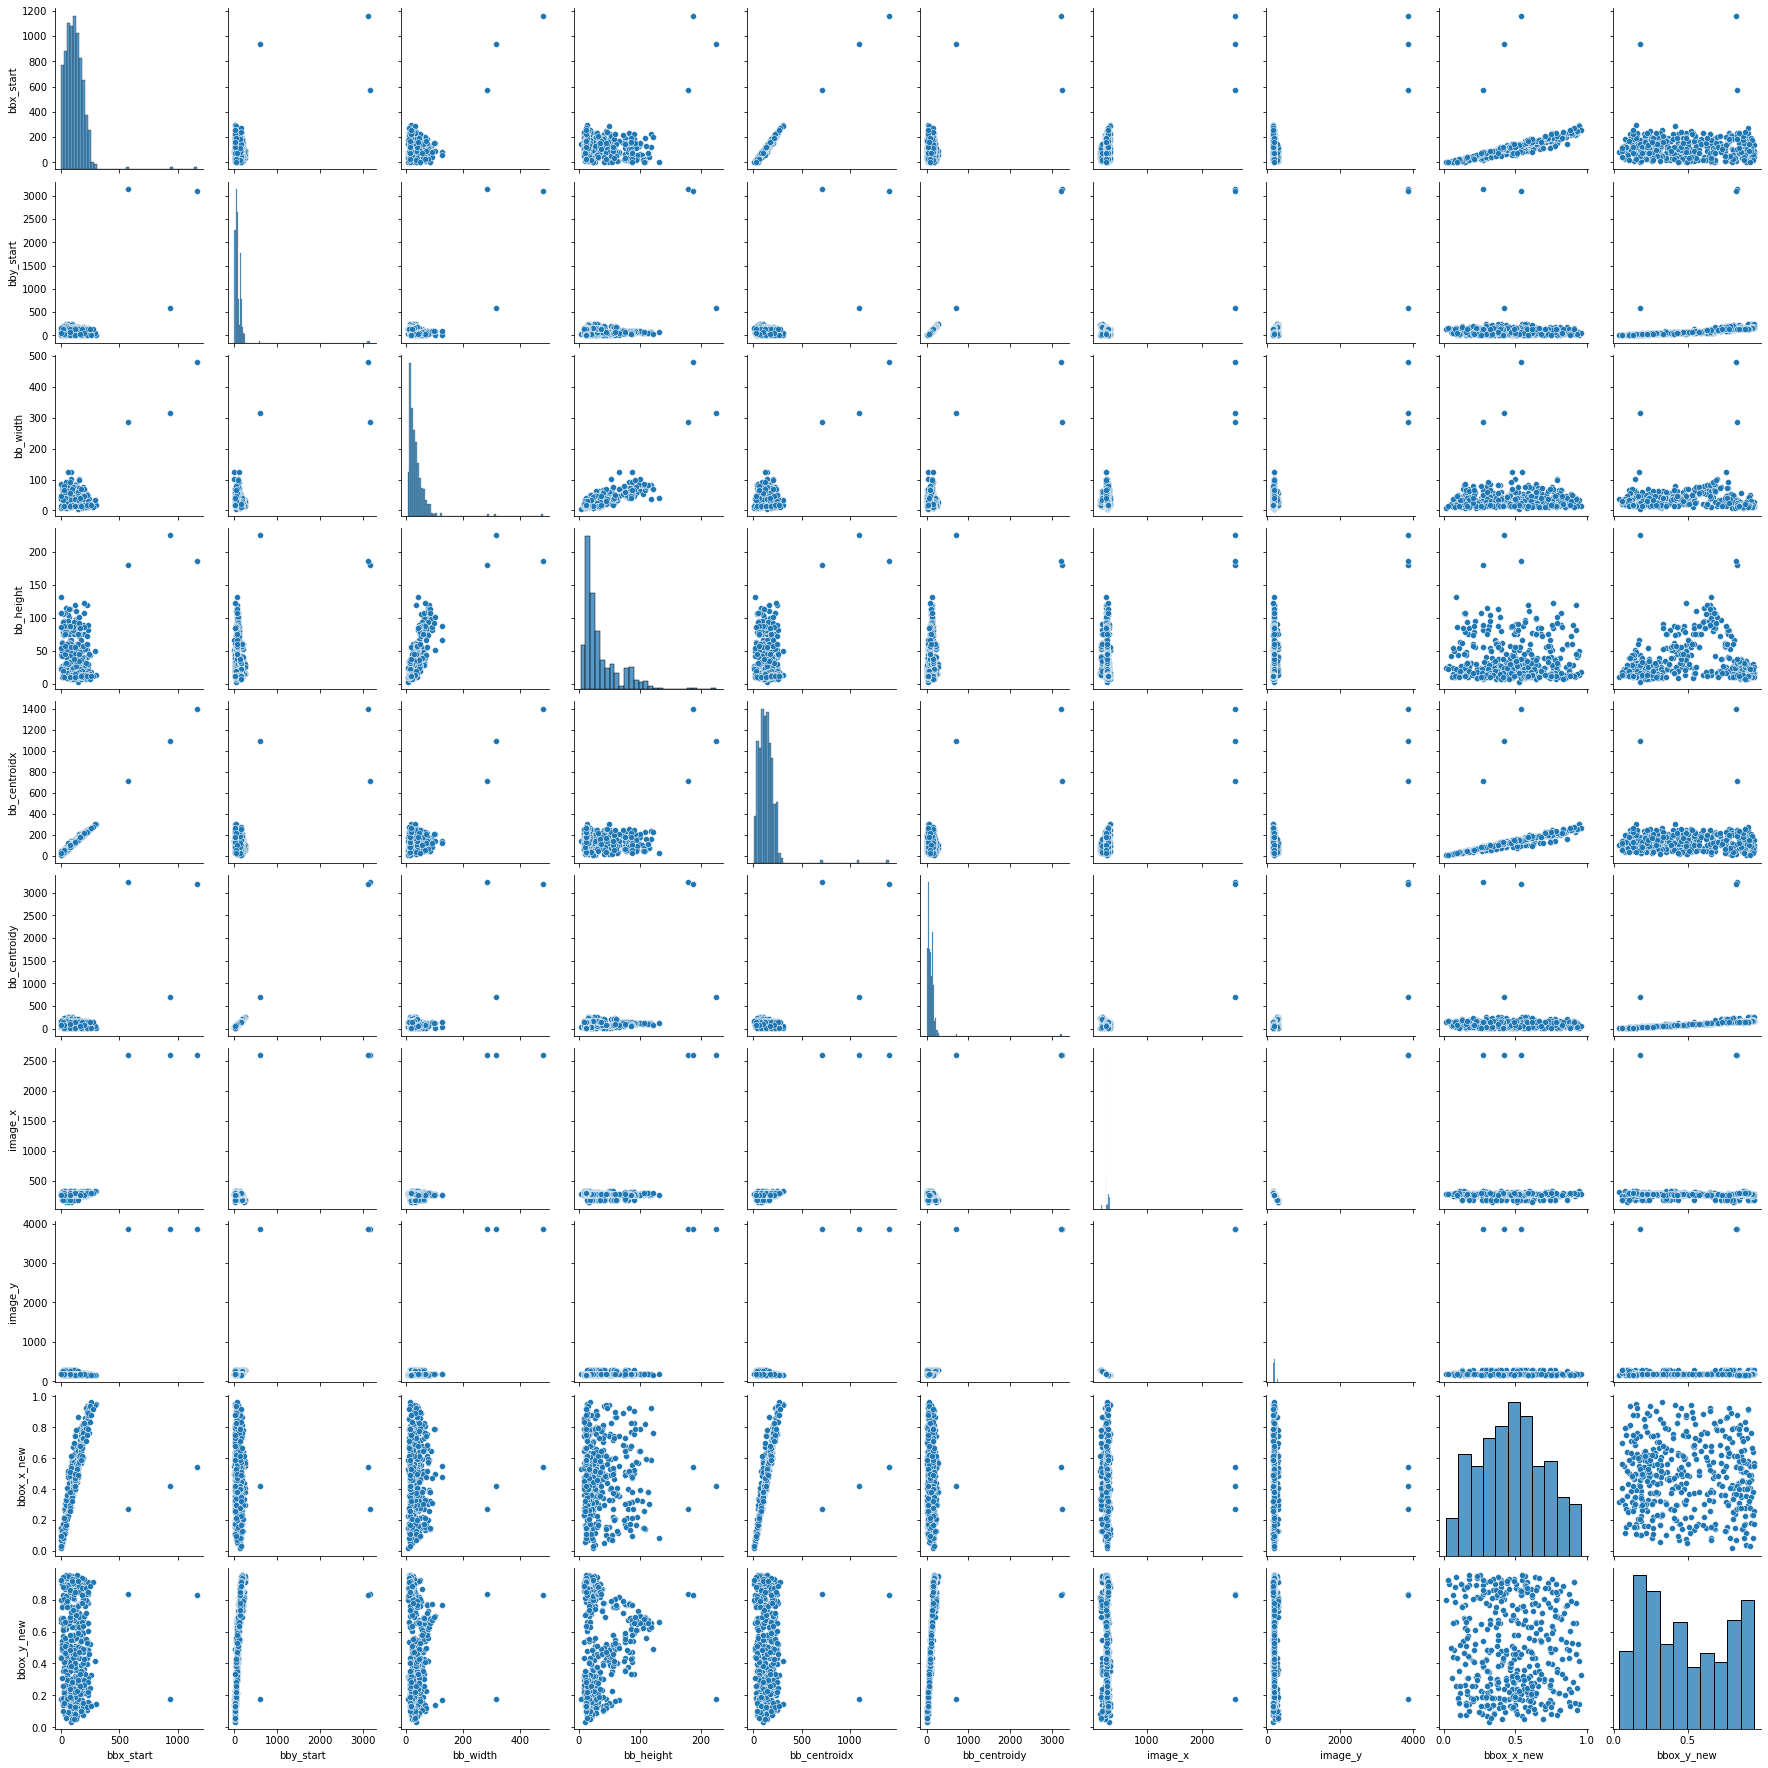

In [31]:
sns.pairplot(final_dataset)

## Let's do clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
result =[]

In [34]:
cluster_data = final_dataset[['bbox_x_new','bbox_y_new']]

In [35]:
cluster_data.head()

,bbox_x_new,bbox_y_new
0,0.427835,0.169884
1,0.407216,0.405405
2,0.438144,0.841699
3,0.546392,0.833977
4,0.491803,0.432727


In [36]:
cluster_data.to_csv('tmp.csv')

In [37]:
cluster_data1 = cluster_data.copy()

In [38]:
cluster_range = range( 1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init = 5)
    clusters.fit(cluster_data1)
    labels = clusters.labels_
    cluster_errors.append( clusters.inertia_)
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [39]:
clusters_df

,num_clusters,cluster_errors
0,1,57.699535
1,2,30.446062
2,3,20.853817
3,4,14.135956
4,5,11.645589
5,6,9.931564
6,7,8.380425
7,8,6.987526
8,9,6.025827


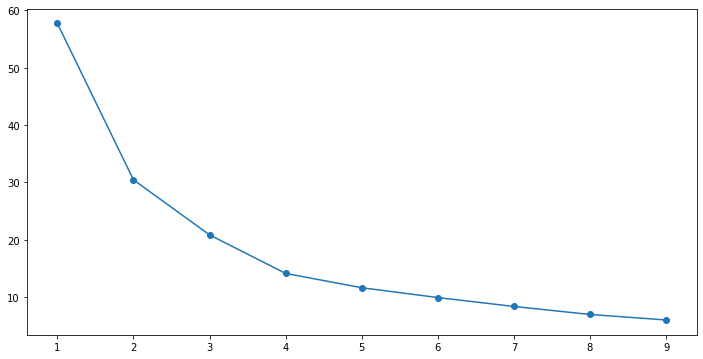

In [40]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.xlabel = "Number of clusters"
plt.ylabel = "distortion"
plt.plot(cluster_range, cluster_errors, marker = "o" )

### Best cluster can be 4 as per the elbow curve

In [41]:
clusters = KMeans(4,n_init = 5)
clusters.fit(cluster_data1)

KMeans(n_clusters=4, n_init=5)

In [42]:
centroids = clusters.cluster_centers_
centroids

array([[0.27609942, 0.27183851],
       [0.64130592, 0.27749259],
       [0.67536744, 0.75362708],
       [0.27436535, 0.79426221]])

In [43]:
df_bbox_centroid = pd.DataFrame(centroids, columns = list(cluster_data1) )
df_bbox_centroid

,bbox_x_new,bbox_y_new
0,0.276099,0.271839
1,0.641306,0.277493
2,0.675367,0.753627
3,0.274365,0.794262


In [44]:
cluster_data1['labels'] = clusters.labels_

In [45]:
cluster_data1

,bbox_x_new,bbox_y_new,labels
0,0.427835,0.169884,0
1,0.407216,0.405405,0
2,0.438144,0.841699,3
3,0.546392,0.833977,2
4,0.491803,0.432727,1
...,...,...,...
452,0.379310,0.575130,3
453,0.214559,0.409326,0
454,0.095785,0.435233,0
455,0.827586,0.430052,1


### Visualizing cluster

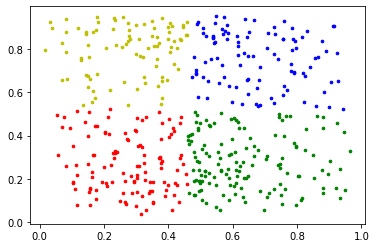

In [46]:
colors = ['r', 'g', 'b','y']
fig, ax = plt.subplots()
labels_num = [0,1,2,3]
for i in labels_num:
    points = np.array(cluster_data1.loc[cluster_data1['labels'] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])